In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coffee.csv', index_col = 0)
df.head()

,Date,Brand,Roast,Blend,Iced,Grind_size,Method,Amount_coffee,Amount_water,Amount_ice,Bloom_time,Rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,Deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,Deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


In [3]:
# Time to clean the data
df.columns = df.columns.str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,Deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,Deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


In [4]:
df['brand'] = df['brand'].str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['roast'] = df['roast'].str.lower()
df['blend'] = df['blend'].str.lower()
df['method'] = df['method'].str.lower()
df['iced'] = df['iced'].str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.5
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.0
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.5
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           186 non-null    datetime64[ns]
 1   brand          186 non-null    object        
 2   roast          186 non-null    object        
 3   blend          186 non-null    object        
 4   iced           185 non-null    object        
 5   grind_size     186 non-null    int64         
 6   method         186 non-null    object        
 7   amount_coffee  186 non-null    int64         
 8   amount_water   186 non-null    int64         
 9   amount_ice     43 non-null     object        
 10  bloom_time     186 non-null    int64         
 11  rating         186 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 18.9+ KB


In [7]:
for method in df['method']:
    print(method[:15])

chemex
chemex
chemex
chemex
chemex
chemex
aeropress (swir
aeropres
aeropress (swir
aeropress (swir
chemex
chemex
chemex
cheme
chemex
chemex
chemex
aeropress (swir
aeropress (swir
chemex
aeropress (swir
aeropress (swir
aeropress (swir
chemex
aeropress (swir
chemex
chemex
chemex
aeropress
aeropress
aeropres
aeropress
chemex
aeropress
aeropress
aeropress
chemex
aeropress
aeropress
chemex
chemex
aeropress
chemex
chemex
chemex
aeropress
chemex
aeropress
aeropress
chemex
aeropress
aeropress
chemex
aeropress
chemex
chemex
aeropress
chemex
chemex
chemex
aeropress
aeropress
chemex
chemex
chemex
aeropress
chemex
chemex
chemex
chemex
chemex
aeropress
aeropress
chemex
aeropress
chemex
chemex
aeropress
chemex
chemex
aeropress
aeropress
chemex
aeropress
aeropress
aeropress
chemex
chemex
aeropress
chemex
aeropress
aeropress
chemex
aeropress
aeropress
aeropress
chemex
aeropress
aeropress
chemex
aeropress
chemex
aeropress
aeropress
chemex
chemex
aeropress
aeropress
chemex
chemex
chemex
aeropress
chemex

In [8]:
df.method = np.where(df.method == 'aeropress (swirl)', 'aeropress', df.method)
df.method = np.where(df.method == 'aeropres', 'aeropress', df.method)
df.iat[7, 6] = 'aeropress'
df.iat[13, 6] = 'chemex'
df.roast = np.where(df.roast == 'unknonw', 'unknown', df.roast)
df

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.00
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.50
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.00
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.50
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2022-12-09,bason,dark,mexican dark,no,11,french press,35,553,NaN,0,8.25
182,2022-12-11,bason,unknown,jingle bell java,no,11,chemex,35,553,NaN,45,8.75
183,2022-12-14,bason,unknown,mistletoe java,no,6,aeropress,22,250,NaN,0,8.50
184,2022-12-14,bason,unknown,mistletoe java,no,11,chemex,35,550,NaN,45,8.25


In [9]:
df.tail(15)

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
171,2022-12-02,bason,unknown,jingle bell java,no,11,chemex,35,261,NaN,45,8.00
172,2022-12-05,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,552,NaN,50,8.25
173,2022-12-04,bason,unknown,jingle bell java,no,11,chemex,35,561,NaN,45,8.50
174,2022-12-05,bason,dark,mexican dark,no,6,aeropress,22,242,NaN,0,8.00
175,2022-12-06,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,553,NaN,45,8.25
176,2022-12-06,bason,dark,mexican dark,no,6,aeropress,22,247,NaN,0,8.00
177,2022-12-07,bason,dark / medium,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25
178,2022-12-07,bason,dark,mexican dark,no,6,aeropress,22,242,NaN,0,8.25
179,2022-12-08,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25
180,2022-12-09,bason,dark,mexican dark,no,6,aeropress,22,245,NaN,0,8.00


In [44]:
df.blend = np.where(df.blend == '4&20 french roost', '4&20 french roast', df.blend)
df.blend = np.where(df.blend == 'ethiopian yirgacheffe\t', 'ethiopian yirgacheffe', df.blend)
df.blend = np.where(df.blend == 'sea salt caramel', 'sea salt caramel mocha', df.blend)
df.method = np.where(df.method == 'cheme', 'chemex', df.method)
df.roast = np.where(df.roast == 'meidum', 'medium', df.roast)
df.blend = np.where(df.blend == 'ruff weathre', 'ruff weather', df.blend)
df.blend = np.where(df.blend == 'el salvador pacamara / nicaragua maragogype\t', 
                    'el salvador pacamara / nicaragua maragogype', df.blend)
df.roast = np.where(df.roast == 'dark / medium', 'medium / dark', df.roast)

In [45]:
ratio = df.amount_water / df.amount_coffee
df['ratio'] = ratio
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,ratio
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0,11.976190
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.5,15.363636
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.0,16.322581
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.5,12.600000
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.5,11.803922


In [46]:
sns.set_theme(style = 'darkgrid')

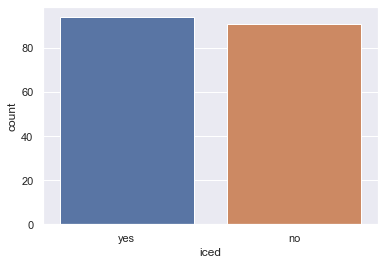

In [47]:
sns.countplot(data = df, x = 'iced')
plt.show()

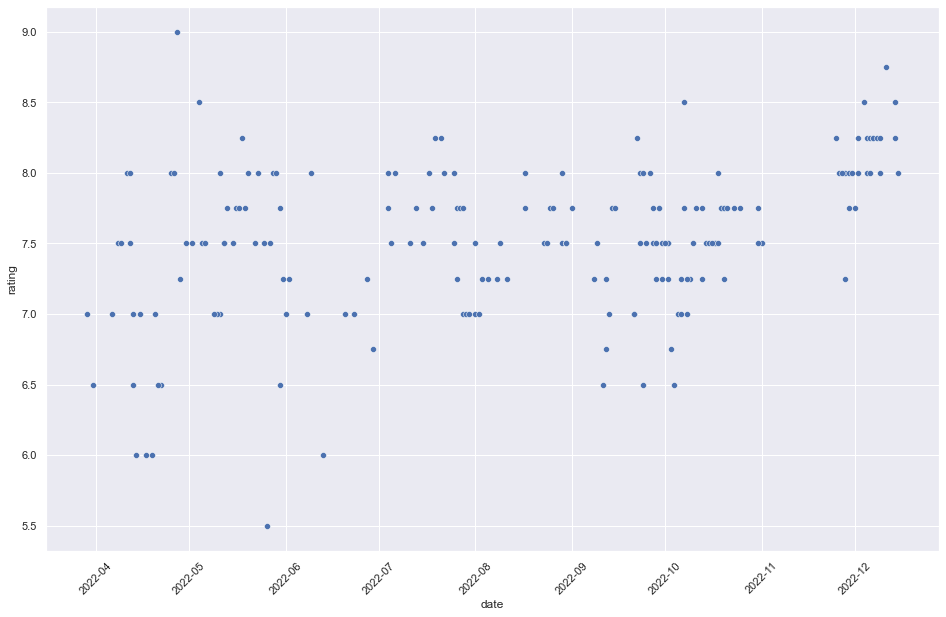

In [48]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45)
sns.scatterplot(x='date', y = 'rating', data = df)
plt.show()

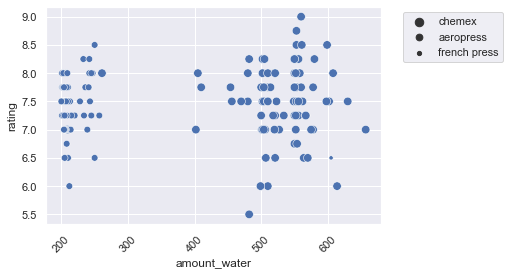

In [49]:
sns.scatterplot(x = 'amount_water', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

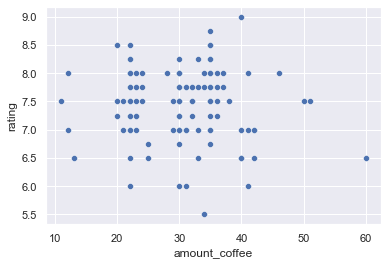

In [50]:
sns.scatterplot(x = 'amount_coffee', y = 'rating', data = df)
plt.show()

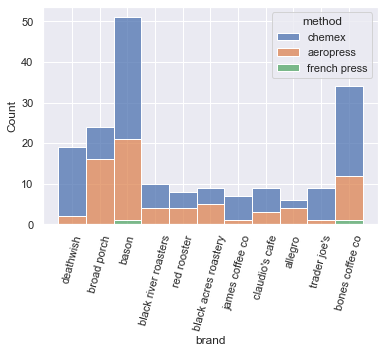

In [51]:
sns.histplot(x = 'brand', hue = 'method', multiple = 'stack', data = df)
plt.xticks(rotation = 75)
plt.show()

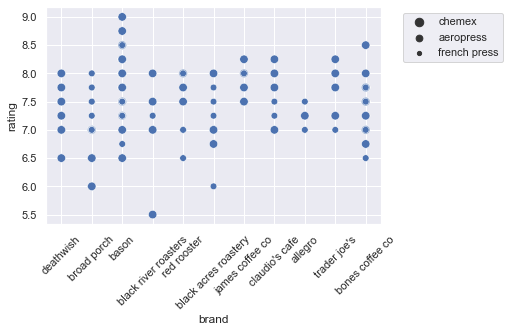

In [52]:
sns.scatterplot(x = 'brand', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

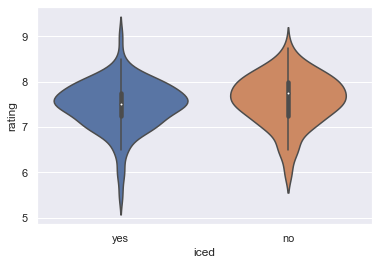

In [53]:
sns.violinplot(data = df, y = 'rating', x = 'iced')
plt.show()

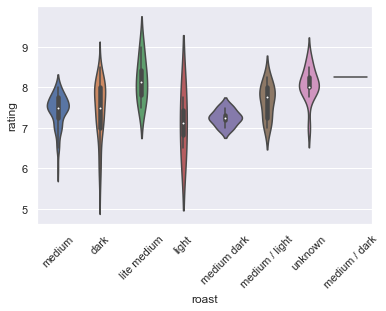

In [54]:
sns.violinplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

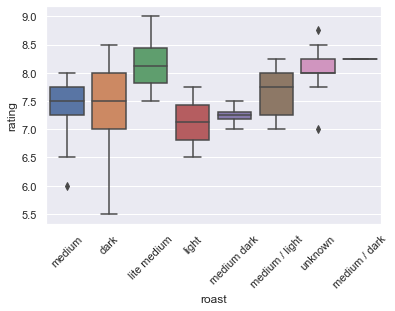

In [55]:
sns.boxplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

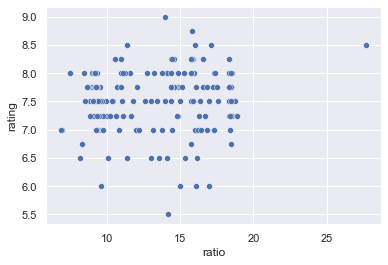

In [56]:
sns.scatterplot(data = df, y = 'rating', x = 'ratio')
plt.show()

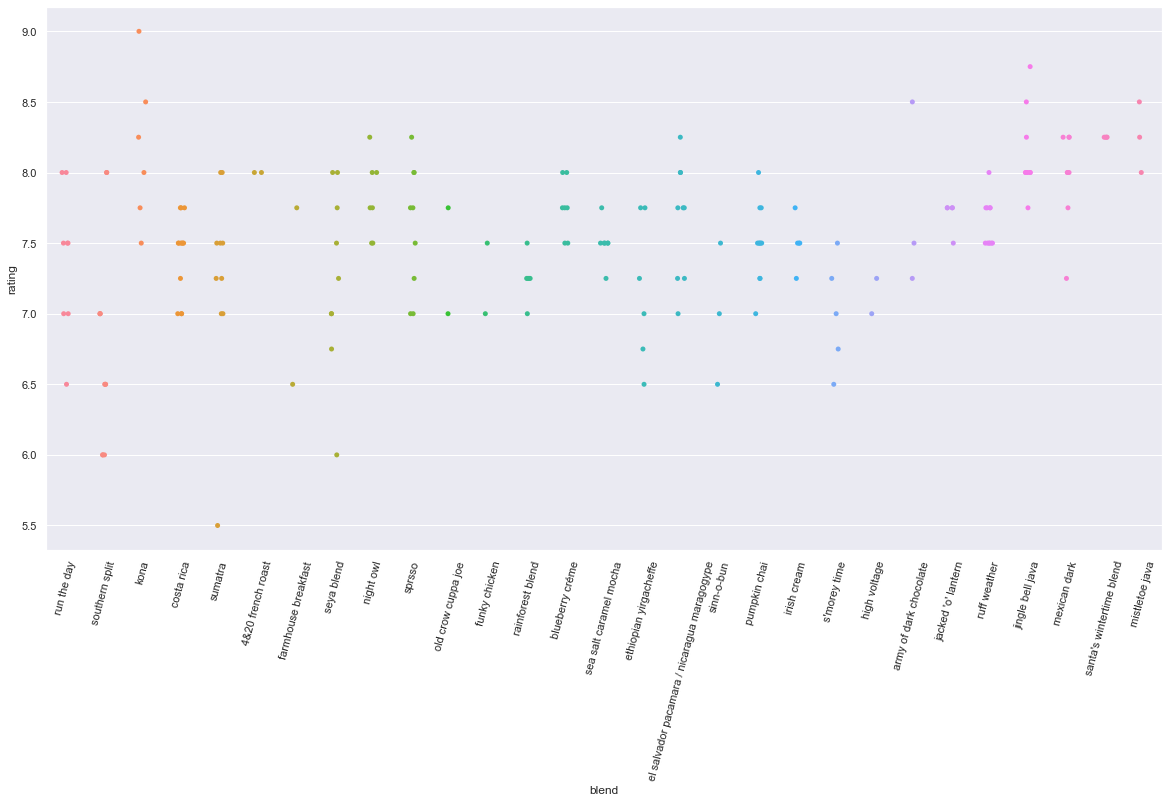

In [57]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df, y = 'rating', x = 'blend')
plt.xticks(rotation = 75)
plt.show()

C:\Users\thomasm\Anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='date', ylabel='rating'>

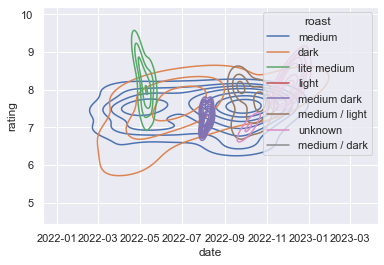

In [58]:
sns.kdeplot(data = df, y = 'rating', x = 'date', hue = 'roast')

In [59]:
df1, df2, df3 = [x for _, x in df.groupby(df['method'])]
# df1 is aeropress, df2 is chemex, df3 is french press

In [43]:
df2.tail()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,ratio
177,2022-12-07,bason,dark / medium,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25,15.885714
179,2022-12-08,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25,15.885714
182,2022-12-11,bason,unknown,jingle bell java,no,11,chemex,35,553,NaN,45,8.75,15.800000
184,2022-12-14,bason,unknown,mistletoe java,no,11,chemex,35,550,NaN,45,8.25,15.714286
185,2022-12-15,bason,unknown,mistletoe java,no,11,chemex,35,552,NaN,45,8.00,15.771429


In [80]:
# df.loc[df['team'] == 'A', 'points'].mean()

for i in df['brand'].unique():
    print(i, df.loc[df['brand'] == i, 'rating'].mean())

deathwish 7.447368421052632
broad porch 7.125
bason 7.872549019607843
black river roasters 7.25
red rooster 7.4375
black acres roastery 7.25
james coffee co 7.821428571428571
claudio's cafe 7.611111111111111
allegro 7.25
trader joe's 7.666666666666667
bones coffee co 7.455882352941177


In [89]:
df.brand.value_counts()[0:]

bason                   51
bones coffee co         34
broad porch             24
deathwish               19
black river roasters    10
black acres roastery     9
claudio's cafe           9
trader joe's             9
red rooster              8
james coffee co          7
allegro                  6
Name: brand, dtype: int64

In [94]:
#df_unique = df.brand.unique()
for i in df['brand'].unique():
    df_unique = (df.loc[df['brand'] == i, 'rating'].mean())

In [97]:
df_3 = df.groupby('brand').agg({'rating':['mean','count']})

In [102]:
#df_3.columns = df_3.columns.droplevel()
df_3

,mean,count
brand,,
allegro,7.250000,6
bason,7.872549,51
black acres roastery,7.250000,9
black river roasters,7.250000,10
bones coffee co,7.455882,34
broad porch,7.125000,24
claudio's cafe,7.611111,9
deathwish,7.447368,19
james coffee co,7.821429,7
